# Matplotlib

A library to plot data in python

* [MatPlotlib Tutorial](https://realpython.com/python-matplotlib-guide/)
* [Scipy Matplotlib](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

In [44]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

## The Matplotlib Object Hierarchy

One important big-picture matplotlib concept is its object hierarchy.



A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

![Image](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

* Figure is the outermost container
* Axis is the actual axis in the figure

## Figure & Axes

When you subplot, you can arrange plots in regular grid. You need to specify the number of rows and columns and the number of the plot. 

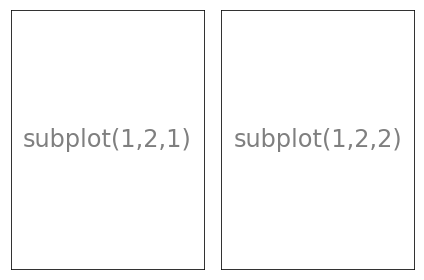

In [13]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(1,2,1)', ha='center', va='center',
        size=24, alpha=.5)

plt.subplot(1, 2, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(1,2,2)', ha='center', va='center',
        size=24, alpha=.5)

plt.tight_layout()
plt.show()

With subplots, we created two variables, one is figure object and other one is axis object

Each figure has by default single axis but can support multiple if required

Text(0.5,0,'cos')

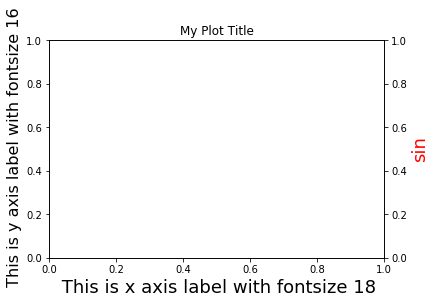

In [33]:
plt.ion()
fig, _ = plt.subplots()

fig.axes[0].set_title("My Plot Title")
fig.axes[0].set_xlabel(" This is x axis label with fontsize 18", fontsize=18)
fig.axes[0].set_ylabel(" This is y axis label with fontsize 16", fontsize=16)

# Setting the xlim, ylim
ax2 = fig.axes[0].twinx()
ax2.set_ylabel('sin', color='r',fontsize=18)
ax2.set_xlabel('cos', color = 'b', fontsize=20)

## Practical example of using two axis in one figure

In [35]:
import numpy as np

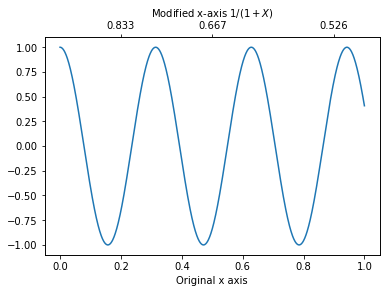

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x = np.linspace(0, 1, 1000)
y = np.cos(x*20)

ax1.plot(x,y)
ax1.set_xlabel(r"Original x axis")

new_tick_locations = np.array([0.2, 0.5, 0.9])

def tick_function(x):
    v = 1/(1+x)
    return ["%0.3f" % z for z in v]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis $1/(1+X)$")
plt.show()

In [41]:
fig.axes

There are two axes present in the figure. We can manipulate anyone of them

# Stateful Versus Stateless Approaches

Above, we used import matplotlib.pyplot as plt to import the pyplot module from matplotlib and name it plt.


Almost all functions from pyplot, such as plt.plot(), are implicitly either referring to an existing current Figure and current Axes, or creating them anew if none exist. Hidden in the matplotlib docs is this helpful snippet:

Calling plt.plot() is just a convenient way to get the current Axes of the current Figure and then call its plot() method. This is what is meant by the assertion that the stateful interface always “implicitly tracks” the plot that it wants to reference.

Calling plt.title() gets translated into this one line: gca().set_title(s, *args, **kwargs). Here’s what that is doing:

* gca() grabs the current axis and returns it.
* set_title() is a setter method that sets the title for that Axes object. The “convenience” here is that we didn’t need to specify any Axes object explicitly with plt.title().

Similarly, if you take a few moments to look at the source for top-level functions like **plt.grid()**, **plt.legend()**, and **plt.ylabels()**, you’ll notice that all of them follow the same structure of delegating to the current Axes with gca() and then calling some method of the current Axes. (This is the underlying object-oriented approach!)

# Prescribed way of plotting

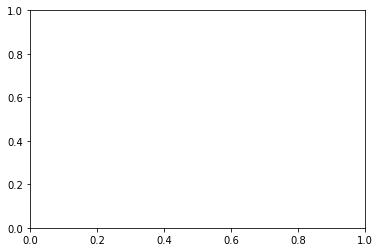

In [46]:
fig, ax = plt.subplots()

# It creates figure and axis object which refers to fig.axis[0]

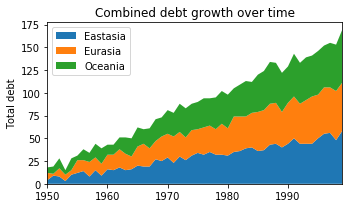

In [48]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs, rng+rnd, labels=['Eastasia','Eurasia','Oceania'])
ax.set_title("Combined debt growth over time")
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

Let's look at multiple axis in one figure

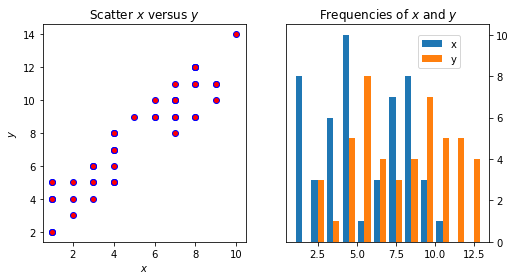

In [56]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x,y))

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize=(8,4))
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title("Scatter $x$ versus $y$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")

# second axis
ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x','y'))
ax2.legend(loc=(0.65,0.8))
ax2.set_title("Frequencies of $x$ and $y$")
ax2.yaxis.tick_right()

There’s a little bit more going on in this example:

* Because we’re creating a “1x2” Figure, the returned result of plt.subplots(1, 2) is now a Figure object and a NumPy array of Axes objects. (You can inspect this with fig, axs = plt.subplots(1, 2) and taking a look at axs.)

* We deal with ax1 and ax2 individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the yaxis belonging to the second Axes, placing its ticks and ticklabels to the right.

* Text inside dollar signs utilizes TeX markup to put variables in italics.

Taking this one step further, we could alternatively create a figure that holds a 2x2 grid of Axes objects:

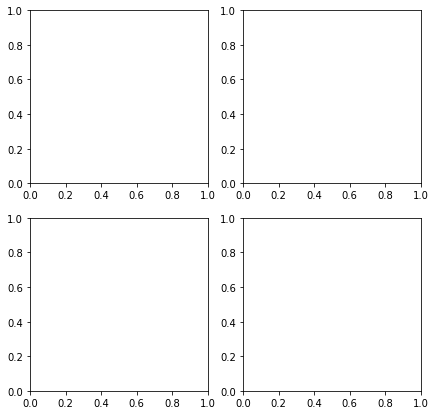

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [58]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb684700d0>,
      dtype=object)

We now need to call plotting methods on each of these Axes (but not the NumPy array, which is just a container in this case). A common way to address this is to use iterable unpacking after flattening the array to be one-dimensional:

In [60]:
ax1, ax2, ax3, ax4 = ax.flatten()

and then proceed as usual

# "Figure" behind screens

figure behind screens need to be explicitly closed to avoid memory errors

(140717762719120, 140717762719120)
(140717762716112, 140717762716112)


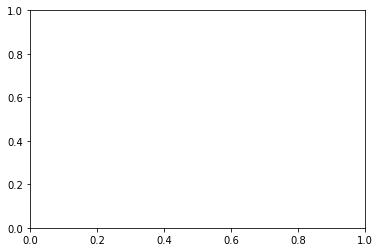

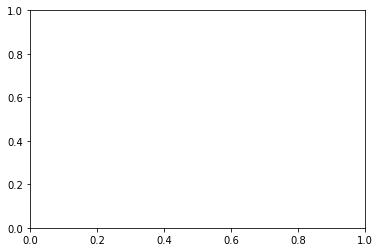

In [63]:
fig1, ax1 = plt.subplots()
print(id(fig1),id(plt.gcf()))


fig2, ax2 = plt.subplots()
print(id(fig2), id(plt.gcf()))

In [66]:
plt.close('all')

# Plotting in Pandas

That is, the plot() method on pandas’ Series and DataFrame is a wrapper around plt.plot(). One convenience provided, for example, is that if the DataFrame’s Index consists of dates, gcf().autofmt_xdate() is called internally by pandas to get the current Figure and nicely auto-format the x-axis.